# 🏥 Healthcare Data Analysis

This analysis explores patient admission records to uncover patterns in medical conditions, hospital stays, insurance coverage and prefered doctor among patients. The aim is to derive actionable insights for hospital administrators and health insurers.

In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prasad22/healthcare-dataset")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 2.91M/2.91M [00:02<00:00, 1.45MB/s]

Extracting files...
Path to dataset files: C:\Users\Lenovo\.cache\kagglehub\datasets\prasad22\healthcare-dataset\versions\2


In [63]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
dataset = pd.read_csv(r"C:/Users/Lenovo/.cache/kagglehub/datasets/prasad22/healthcare-dataset/versions/2/healthcare_dataset.csv", index_col=False)
df = dataset.copy()

In [67]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [69]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [71]:
#Cleaned the Name column data
df['Name'] = df['Name'].str.title()

In [73]:
df.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
5,Emily Johnson,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal
6,Edward Edwards,21,Female,AB-,Diabetes,2020-11-03,Kelly Olson,Group Middleton,Medicare,19580.872345,389,Emergency,2020-11-15,Paracetamol,Inconclusive
7,Christina Martinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,2022-01-07,Paracetamol,Inconclusive
8,Jasmine Aguilar,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,2020-07-14,Aspirin,Abnormal
9,Christopher Berg,58,Female,AB-,Cancer,2021-05-23,Heather Day,Padilla-Walker,UnitedHealthcare,19784.631062,249,Elective,2021-06-22,Paracetamol,Inconclusive


---

In [75]:
# All the columns with their datatypes
df.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [77]:
#Changed datatype of 'Date of Admission' and 'Dischare Date' from string/object to datetime format.
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df.dtypes

Name                          object
Age                            int64
Gender                        object
Blood Type                    object
Medical Condition             object
Date of Admission     datetime64[ns]
Doctor                        object
Hospital                      object
Insurance Provider            object
Billing Amount               float64
Room Number                    int64
Admission Type                object
Discharge Date        datetime64[ns]
Medication                    object
Test Results                  object
dtype: object

In [79]:
# Summary of null values
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [89]:
#Summary of stay duration of a patient

df["Stay Duration (Days)"] = (df["Discharge Date"] - df ["Date of Admission"]).dt.days
duration=df[["Name", "Date of Admission", "Discharge Date", "Stay Duration (Days)"]]
duration.head()

,Name,Date of Admission,Discharge Date,Stay Duration (Days)
0,Bobby Jackson,2024-01-31,2024-02-02,2
1,Leslie Terry,2019-08-20,2019-08-26,6
2,Danny Smith,2022-09-22,2022-10-07,15
3,Andrew Watts,2020-11-18,2020-12-18,30
4,Adrienne Bell,2022-09-19,2022-10-09,20


In [81]:
# Summary of numerical data
df.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date
count,55500.000000,55500,55500.000000,55500.000000,55500
mean,51.539459,2021-11-01 01:02:22.443243008,25539.316097,301.134829,2021-11-16 13:15:20.821621504
min,13.000000,2019-05-08 00:00:00,-2008.492140,101.000000,2019-05-09 00:00:00
25%,35.000000,2020-07-28 00:00:00,13241.224652,202.000000,2020-08-12 00:00:00
50%,52.000000,2021-11-01 00:00:00,25538.069376,302.000000,2021-11-17 00:00:00
75%,68.000000,2023-02-03 00:00:00,37820.508436,401.000000,2023-02-18 00:00:00
max,89.000000,2024-05-07 00:00:00,52764.276736,500.000000,2024-06-06 00:00:00
std,19.602454,NaN,14211.454431,115.243069,NaN


In [83]:
df.describe(include='object')

,Name,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Admission Type,Medication,Test Results
count,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500
unique,40235,2,8,6,40341,39876,5,3,5,3
top,Michael Williams,Male,A-,Arthritis,Michael Smith,LLC Smith,Cigna,Elective,Lipitor,Abnormal
freq,24,27774,6969,9308,27,44,11249,18655,11140,18627


---
# Overall Data. 

✅ Data does not contain any null value.

✅ Title-cased names, improving consistency.

✅ Converted date columns to proper datetime format.

✅ Calculated stay duration using date differences.


---

# 🏥 Summary of Monthly Admissions in the Hospital

This report highlights the trend of patient admissions recorded across all 12 months of the year. It provides insights into the months with the highest and lowest admissions, helping hospital staff and health authorities plan and prepare accordingly.

---

## 📊 Admissions Trend by Month

- **January**: 4,692 admissions  
- **February**: 4,255 admissions  
- **March**: 4,672 admissions  
- **April**: 4,518 admissions  
- **May**: 4,599 admissions  
- **June**: 4,699 admissions  
- **July**: 4,812 admissions  
- **August**: **4,832 admissions** 🔺 *(Highest)*  
- **September**: 4,546 admissions  
- **October**: 4,678 admissions  
- **November**: 4,548 admissions  
- **December**: 4,649 admissions

> 🔍 **Observation**: February recorded the lowest number of admissions (**4,255**), while August witnessed the highest (**4,832**), indicating a **577-patient difference** between the lowest and peak month.

---

## 📈 Key Insights

- After a **dip in February**, admissions began to **rise steadily from March onwards**, suggesting a possible seasonal or environmental factor.
- The **peak in August** marks a critical period for hospital staff, with admissions reaching the highest point of the year.
- This trend indicates a need for **preparedness and resource allocation** during mid-to-late monsoon months (July–September in many regions), which may correlate with seasonal illnesses.

---

## 📌 Recommendations

- **Hospital staff** should plan for potential **overtime, increased patient load, and additional medical supplies** during the month of August.
- **Public health officials** and **local authorities** should:
  - Investigate possible causes behind the August spike (e.g., viral outbreaks, weather-related health issues).
  - Launch **awareness campaigns** in July or early August to **educate the public** about preventive measures.
- **People should take extra precautions** during this time — especially the elderly and those with pre-existing conditions — to avoid seasonal or infectious diseases.

In [225]:
#Summary of admission of patients per month

df["Admission by Month"] = df["Date of Admission"].dt.month
admission_per_month = df.groupby('Admission by Month').size()

month_of_admission = pd.DataFrame({'month': admission_per_month.index, 'Admissions': admission_per_month.values}, index=None)
month_of_admission

,month,Admissions
0,1,4692
1,2,4255
2,3,4672
3,4,4518
4,5,4599
5,6,4699
6,7,4812
7,8,4832
8,9,4546
9,10,4678


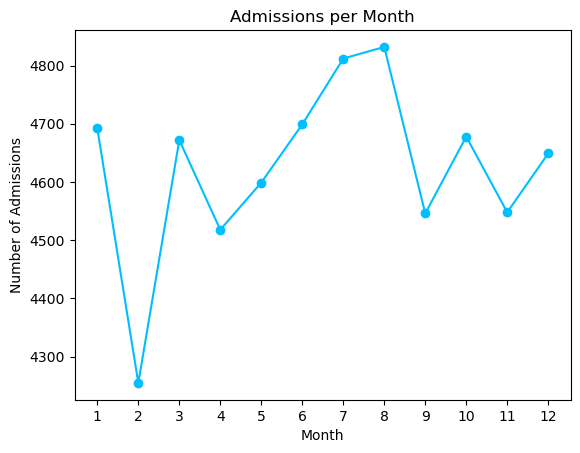

In [249]:
#Summary of admission per month

plt.plot(month_of_admission['month'], month_of_admission['Admissions'], marker='o', color='#00BFFF')
plt.title("Admissions per Month")
plt.xlabel("Month")
plt.ylabel("Number of Admissions")
plt.xticks(ticks=range(1, 13))
plt.show()

---

## ✅ Conclusion

The monthly admission trend clearly highlights a **cyclical pattern**, with significant fluctuations that require both medical and administrative attention. **Data-backed planning** and **preventive healthcare efforts** can greatly reduce the patient burden during peak months and ensure smoother hospital operations throughout the year.

---

# 🏥 Summary of Various Medical Conditions Observed in Patients

This section presents a detailed overview of the most commonly observed medical conditions among patients, based on the available dataset. The data highlights key trends in public health concerns, with some conditions showing alarmingly high prevalence.

---

## 📊 Top Reported Medical Conditions

- **Arthritis** is the most reported medical condition, affecting **9,308** individuals.
- **Diabetes** follows closely, with **9,304** patients diagnosed.
- **Hypertension** ranks third, with **9,245** reported cases.
- **Obesity** comes next, with **9,231** patients affected.
- **Cancer** affects **9,227** individuals.
- **Asthma** is the least reported condition on this list, with **9,185** cases.

> 🔍 **Observation:** The gap between Arthritis and Diabetes is just **4 patients**, which reflects how close these two conditions are in terms of frequency. All conditions listed here are reported in **over 9,000** cases, indicating widespread prevalence.

---

## 🧠 Health Insights & Interpretation

- The top three conditions — **Arthritis, Diabetes, and Hypertension** — are strongly associated with **age, poor lifestyle choices, sedentary behavior, and dietary patterns**.
- The **minimal difference** in patient numbers among the top five conditions suggests that these issues are **equally pressing** from a public health standpoint.
- While **Asthma** has the lowest count among the six, **9,185** is still a significant number and should not be overlooked.

> ⚠️ **Key Insight:** The dominance of lifestyle-related diseases such as Arthritis, Diabetes, and Hypertension indicates a **critical need for awareness, preventive care, and public health intervention**.


In [93]:
#Number of different medical conditions of the patients

df["Medical Condition"].value_counts()

Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64

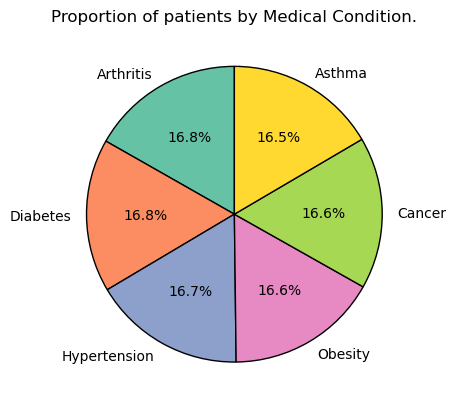

In [95]:
#Proportion of patients by Medical Conditions.

condition_count = df["Medical Condition"].value_counts()
plt.pie(condition_count, labels=condition_count.index, autopct='%1.1f%%', startangle=90,colors=sns.color_palette("Set2", len(condition_count)).as_hex(),wedgeprops={'edgecolor': 'black'})

plt.title("Proportion of patients by Medical Condition.")
plt.show()

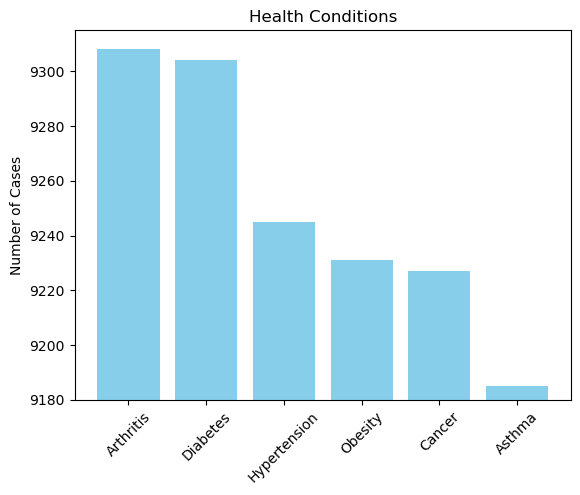

In [319]:
#Summary of different medical conditions of patients.

plt.bar(condition_count.index, condition_count, color='skyblue')
plt.ylim(9180, 9315)
plt.title("Health Conditions")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
#plt.grid(axis='y')
plt.show()

---

## 📌 Conclusion

The data underscores a major health challenge — the **increasing burden of chronic, lifestyle-driven medical conditions**. With over 9,000 reported cases for each of the listed ailments, healthcare providers and policymakers should prioritize **preventive strategies**, **early screening**, and **public education** to combat these trends.

Improving dietary habits, encouraging physical activity, and providing accessible healthcare services could play a significant role in reducing these numbers in the long term.

---

In [109]:
#Number of insurances sold by the company

insurance_count = df["Insurance Provider"].value_counts()
insurance_count

Insurance Provider
Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: count, dtype: int64

# 📈 Summary of Insurance Sales and Customer Preferences

This analysis provides a summary of the number of insurance policies sold by different companies and highlights the preferences of customers based on the data.

## 🏢 Insurance Provider Performance

According to the dataset:

- **Cigna** has sold the highest number of insurance policies, totaling **11,249**.  
- **Medicare** follows in second place with **11,154** policies sold.  
- **United Health Care** is very close behind, securing the third position with **11,125** policies.  
- **Blue Cross** ranks fourth, having sold **11,059** policies.  
- **Aetna** is in the last position, with **10,913** policies sold.

> 🔍 **Insight:** The top three companies (Cigna, Medicare, and United Health Care) are in close competition, with only marginal differences in the number of policies sold. The difference between the first and third positions is just **124** policies.

---

## 📊 Interpretation of Preferences

The data suggests a clear preference trend among customers:

- **Cigna** appears to be the most trusted and preferred insurance provider, as it leads in total policies sold.
- **Medicare** and **United Health Care** are providing strong competition, suggesting a relatively balanced market share among the top three providers.
- **Blue Cross** also holds a significant share, although slightly behind.
- **Aetna** seems to be the least preferred among the five, possibly indicating lesser popularity or outreach.

---

## 📌 Key Takeaways

- Customer preference is **highly competitive** among the top three insurance companies.
- The **gap between the first and last** ranked providers is **336 policies**, which, while not massive, could indicate branding, pricing, or service-level differences.
- Further analysis may explore:
  - **Demographics** of customers choosing each provider
  - **Monthly trends** in sales
  - **Correlation with location, gender, or age**

---

## ✅ Conclusion

The insurance market in this dataset reflects a competitive scenario with **Cigna leading**, but not by an overwhelming margin. **Continuous improvement in service, customer engagement, and marketing** could help other companies narrow the gap or surpass the current leader.


In [267]:
#Summary of Insurance sold

df["Insurance Provider"].describe()

count     55500
unique        5
top       Cigna
freq      11249
Name: Insurance Provider, dtype: object

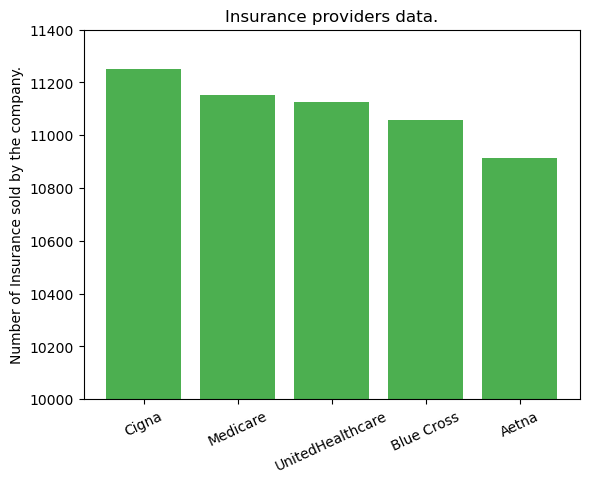

In [376]:
#Visualisation of Insurance providers data

plt.bar(insurance_count.index, insurance_count, color = '#4CAF50')
plt.ylim(10000, 11400)
plt.title("Insurance providers data.")
plt.ylabel("Number of Insurance sold by the company.")
plt.xticks(rotation=25)
plt.show()

In [313]:
#Summary of categorical differenciation of patients based on their Gender Data.

df['Gender'] = df["Gender"].str.title()
print(df["Gender"].value_counts())

Gender
Male      27774
Female    27726
Name: count, dtype: int64


In [251]:
df['Admission Type'].value_counts()

Admission Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64

In [261]:
#Summary of Admission type of a patient

df['Admission Type'].describe(include="object")

count        55500
unique           3
top       Elective
freq         18655
Name: Admission Type, dtype: object

---

---

# 🩺 **Doctor's Summary**

## 📊 **Top 10 Doctors Based on Number of Patients Treated**

The dataset contains a total of **40,341** rows, from which we extracted the **top 10 doctors** who treated the highest number of patients. The list below highlights the names of these doctors along with the number of patients each of them treated:

1. **Dr. Michael Smith** – **27** patients
2. **Dr. Robert Smith** – **22** patients
3. **Dr. John Smith** – **22** patients
4. **Dr. Michael Johnson** – **20** patients
5. **Dr. James Smith** – **20** patients
6. **Dr. Robert Johnson** – **19** patients
7. **Dr. David Smith** – **19** patients
8. **Dr. Michael Williams** – **18** patients
9. **Dr. Matthew Smith** – **17** patients
10. **Dr. Christopher Smith** – **17** patients

---

## 📌 **Key Observations**

* **Dr. Michael Smith** stands out by treating the highest number of patients (**27**), making him the **most preferred doctor** in this dataset.
* **Dr. Robert Smith** and **Dr. John Smith** are tied in second and third positions, each having treated **22** patients.
* The difference between the **top** (27 patients) and the **10th** doctor on the list (17 patients) is **10 patients**, which is a considerable gap.

---

## 📈 **Insights for Hospital Management**

* 🏅 **Recognition & Rewards**: Doctors like **Dr. Michael Smith**, **Dr. Robert Smith**, and **Dr. John Smith** should be appreciated for handling a higher number of patients.
* 🛠️ **Workload Balancing**: Such data helps identify overburdened doctors and assists in distributing the workload more evenly.
* 🧠 **Preference Patterns**: These numbers may also reflect **patient preferences**, and such doctors can be studied further for their approach, communication, or specialization.

---


In [285]:
df['Doctor'].value_counts()

Doctor
Michael Smith           27
Robert Smith            22
John Smith              22
Michael Johnson         20
James Smith             20
                        ..
Audrey Zimmerman DDS     1
Justin Banks             1
Joseph Williams Jr.      1
Jason Franklin           1
Jeffrey Moore            1
Name: count, Length: 40341, dtype: int64

In [381]:
doctor_df = df["Doctor"].value_counts().reset_index()
doctor_df.columns = ["Doctor Name", "Number of Patients Treated"]
doctor_df

,Doctor Name,Number of Patients Treated
0,Michael Smith,27
1,Robert Smith,22
2,John Smith,22
3,Michael Johnson,20
4,James Smith,20
...,...,...
40336,Audrey Zimmerman DDS,1
40337,Justin Banks,1
40338,Joseph Williams Jr.,1
40339,Jason Franklin,1


In [383]:
doctor_df.head(10)

,Doctor Name,Number of Patients Treated
0,Michael Smith,27
1,Robert Smith,22
2,John Smith,22
3,Michael Johnson,20
4,James Smith,20
5,Robert Johnson,19
6,David Smith,19
7,Michael Williams,18
8,Matthew Smith,17
9,Christopher Smith,17


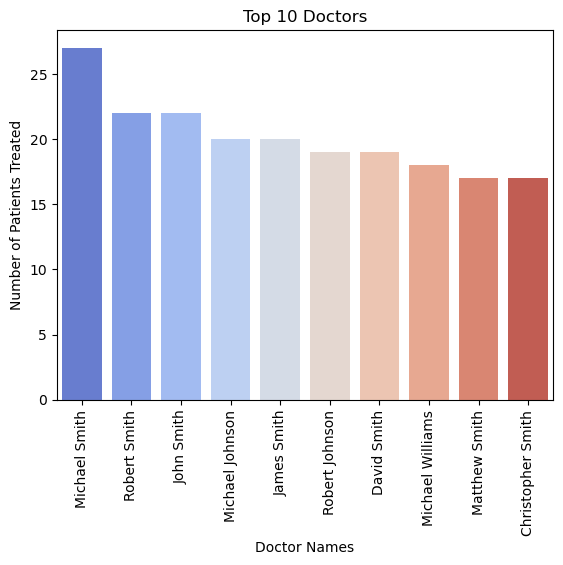

In [372]:
top_10_doctor = doctor_df.sort_values(by="Number of Patients Treated", ascending=False).head(10)
sns.barplot(data=top_10_doctor, x="Doctor Name", y="Number of Patients Treated", palette="coolwarm", hue="Doctor Name", legend=False)
plt.xticks(rotation=90)
plt.title("Top 10 Doctors")
plt.xlabel("Doctor Names")
plt.ylabel("Number of Patients Treated")
plt.show()

---

# ✅ **Conclusion**

Based on the analysis of doctor-wise patient data from a dataset of **40,341 records**, it is evident that certain doctors have handled a significantly larger number of patients compared to others. **Dr. Michael Smith**, for instance, has treated **27 patients**, making him the **most active and possibly most preferred doctor** in this dataset. A noticeable gap of **10 patients** exists between the top-ranked and the tenth-ranked doctor, which clearly shows **variation in workload and preference**.

This insight holds strong relevance for hospital management:

* It helps identify **doctors with higher patient load**, which can guide workload distribution.
* Recognizing such doctors can lead to **performance-based rewards and appreciation**, boosting morale and maintaining motivation among staff.
* These trends may also indicate **patient preferences**, which can be further explored to understand what factors make certain doctors more sought after — such as communication style, specialization, availability, or treatment success rates.

Understanding these dynamics will allow management to plan better, optimize staffing, and ensure **quality care delivery** across the board.

> 📊 **Visualizing this data enables instant recognition of critical trends**, supporting faster and more accurate decision-making at the administrative level.

In conclusion, this data-driven approach empowers the hospital to **acknowledge high-performing doctors**, **balance resources effectively**, and **enhance the overall patient experience** through informed operational strategies.

---

In [390]:
df.to_csv("HealthcareAnalysis.csv", index=None)

# 📈 Final Insights and Recommendations

Based on the exploratory data analysis of the healthcare dataset, here are the key findings:

## 🧠 Medical Conditions
- The most common patient conditions are **Arthritis** and **Diabetes** — both chronic illnesses that may require long-term care and management.
- **Cancer** and **Obesity**, while present, are less frequent in comparison.

## 🏥 Admissions Trends
- Admissions **increase steadily after March** and **peak in August**, suggesting seasonal patterns in patient visits — possibly influenced by climate, work schedules, or delayed treatments post-winter.
- The months of **July and August** may require hospitals to prepare for higher patient loads.

## 💊 Doctors and Preferences
- The most consulted doctors in the dataset are:
  - **Dr. Michael Smith** – 27 patients
  - **Dr. Robert Smith** – 22 patients
  - **Dr. John Smith** – 22 patients
- These doctors might be either more experienced or associated with high-volume departments.

## 🛡️ Insurance Providers
- The top two insurance providers covering patients are:
  - **Cigna**
  - **Medicare**
- This insight is useful for understanding billing partnerships and financial planning.

---

### 📌 Recommendations

- **Hospitals** should focus on resources and staff to manage **Arthritis and Diabetes care**, especially around mid-year.
- **Admissions planning** should anticipate **surges from late spring to summer**, particularly in August.
- **Insurance teams** might focus on optimizing services and negotiations with **Cigna** and **Medicare**, which cover a significant portion of the patients.
